<h1><center>REAL-TIME HANDWIRITNG
RECOGNITION USING TENSORFLOW
AND RASPBERRY PI</center></h1>


<h3><center>by Caleb Winfrey</center></h3>

<h4><center>May 06, 2022</center></h4>
<h4><center>Kennesaw State University</center></h4>

<h3><center>ABSTRACT</center></h3>
Machine learning, and machine vision are a hot topic in today’s technology news with applications like facial recognition and autonomous vehicles with the former being already deployed extensively. However, there is the aspect of using machine learning to read and interpret a person’s handwriting, which in this project is done using a Convolutional Neural Network, that was trained on the MNIST database for handwritten numbers and deployed on a raspberry pi 3b.

<h4><center>TABLE OF CONTENTS</center></h4>

1. INTRODUCTION
    
    1.1 A BREIF HISTORY OF ANN'S AND CNN'S
    
    1.2 GOALS OF THIS PROJECT


2. THEORY
    
    2.1 WHAT IS MACHINE LEARNING?
    
    2.2 HOW DO CNN'S WORK?


3. PROCEDURE AND DESIGN
    
    3.1 SETTING UP THE DEVELOPMENT ENVIROMENT AND HARDWARE
    
    3.2 TRAINING THE NETWORK
    
    3.3 IMPLEMENTATION OF THE HARDWARE
    
    3.4 INTEGRATING TOGETHER


4. DATA AND ANALYSIS
    
    4.1 DATA
    
    4.2 ANALYSIS


5. CONCLUSION


#### 1. INTRODUCTION

##### 1.1 A BREIF HISTORY OF ANN'S AND CNN'S

Machine learning can be used in a multitude of ways, traditional “dense” networks known as Artificial Neural Networks aka MLP’s are typically the depiction of neural networks when explained in an article or an educational video about the topic, But by themselves artificial neural networks have a lot of drawbacks, they are computationally expensive, typically need a lot of training and testing data, are not robust enough to handle data that’s input like the training data and finally are not very accurate typically plateauing at around 60% accuracy. It’s for these reasons artificial neural networks lead to research in machine learning to be more or less abandoned until the mid-1990’s with the introduction of convolutional neural networks (CNN) which deploy convolution and layers to more accurately train and test (up to 90% accuracy is common), are more robust with input data and are typically more bang for the buck as far as computational power is concerned it’s for this reason CNN’s are used for a lot of machine vision application and will be used for this project.

##### 1.2 GOALS OF THIS PROJECT

The main goal of this project was to get experience with both software and hardware side of deploying a CNN, with training the CNN using the MNIST (_Modified National Institute of Standards and Technology database_) data base of “a training set of 60,000 examples, and a test set of 10,000 examples” after training the network, testing with static images to see proper image processing required before giving images to the network for interpretation, like removing color and reducing the image to an array of pixel values. Once satisfactory results are found, use of the pi-camera and giving the network a real time feed of the camera input and testing on handwritten numbers to see how the limited hardware of a raspberry pi handles it. After debugging and optimizing the output of the pi will be programed to output on the SenseHat’s LED matrix the number it sees and the percentage of certainty it “thinks” it is the right number.

#### 2. THEORY

##### 2.1 WHAT IS MACHINE LEARNING?

Machine learning is a method of training neural networks for Classification, Prediction and Generation. There are various methods to train a network, but in this project forward and backward propagation will be used to train the network deciphering handwriting. In short, labeled training data is input to the network, the output is compared on the labeled test data and the weights are updated, the process repeats until a desired accuracy with the test data is achieved.

##### 2.2 How do CNN'S work?

As stated, before machine learning can be done a variety of ways but this report with focus on convolutional neural networks. At a very high-level topology of CNN’s the inputs and outputs of the network are used to train the previously defined network through forward and back propagation like in ANN’s to train the weights of the network to the training data. Then comparing output of the network to the test data, given enough time and data the network is trained to recognize images, however with CNN’s parts of there is additional steps. For example, a 6x6 matrix is multiplied by a filter say a 3x3 matrix called a feature map to get an output through a method called striding, the stride is shifted, and the process repeated until the output is filled.

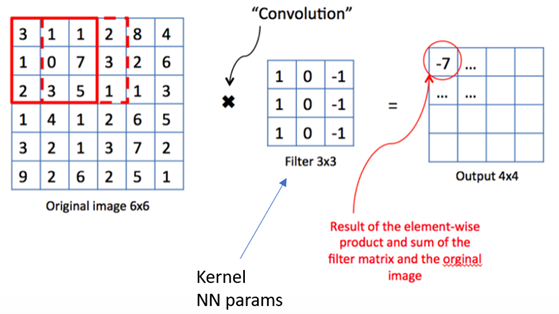
<center>Figure 1. Visualization of Convolution</center>

This is repeated with more filters and feature maps to eventually get the topology:
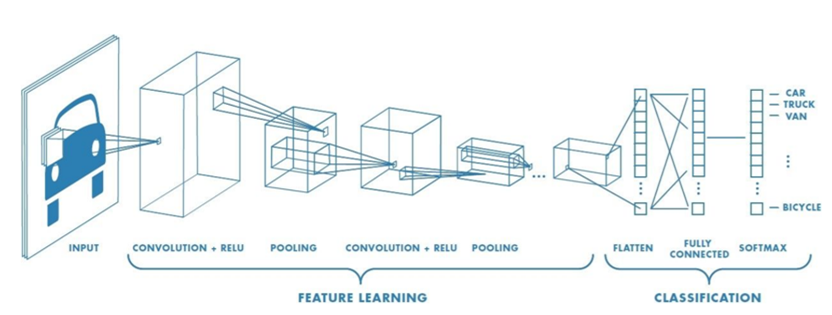
<center>Figure 2. Overall Topology of CNN</center>

#### 3. PROCEDURE AND DESIGN

##### 3.1 SETTING UP THE DEVELOPMENT ENVIROMENT AND HARDWARE

The hardware is a raspberry pi 3b with a SenseHat and picam, while the projected called for a raspberry pi 4 due to the nature of the electronics supply chain at the time of writing an older device had to be used instead. This came with some technical difficulties requiring quite a bit of trouble shooting but eventually worked out and was able to run the required modules including tensorflow which can be seen in the screenshot below.
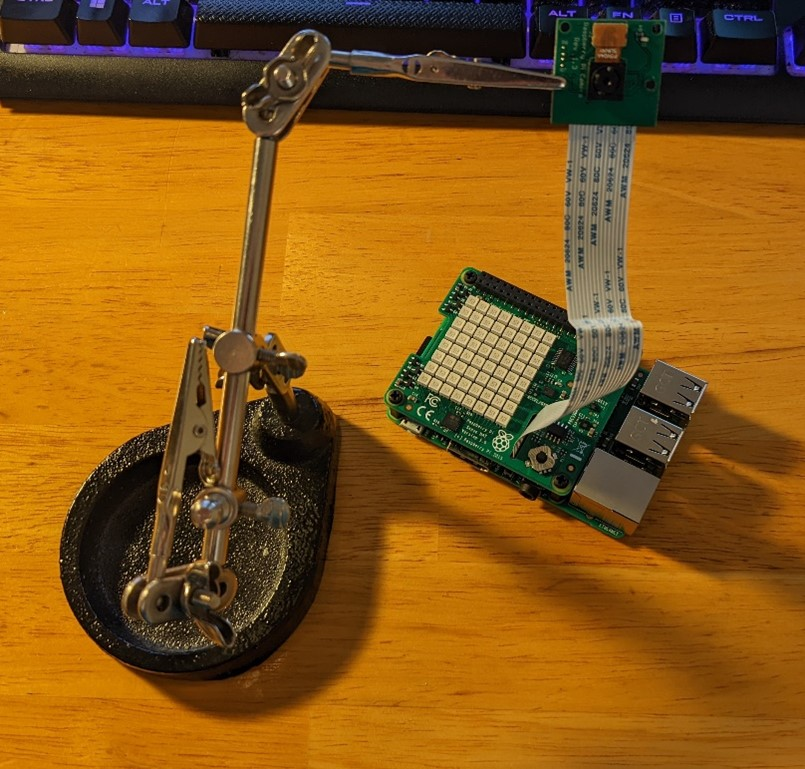
<center>Figure 3. Image of Assembled Hardware</center>

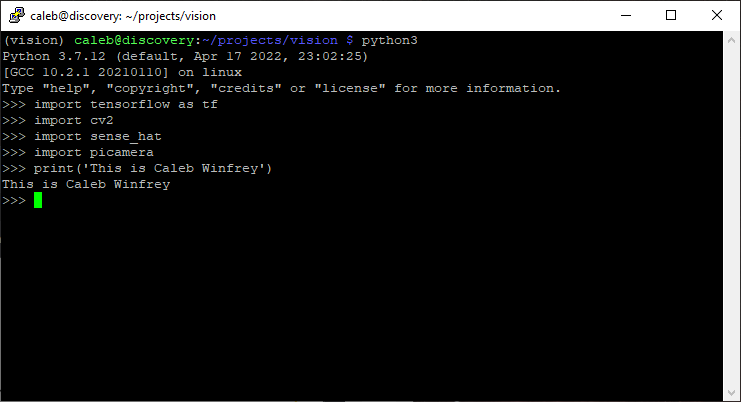
<center>Figure 4. Screenshot of Terminal showing successful install of modules</center>

##### 3.2 TRAINING THE NETWORK

There were complications with this step too, the original plan was to train a high accuracy model through jupyter and import the model, however this proved to cause a few errors that couldn’t be directly addressed. It finally was determined that training had to occur on the pi, this took a while to train but was successful (see screenshot below) also see below for the code used to train the network.

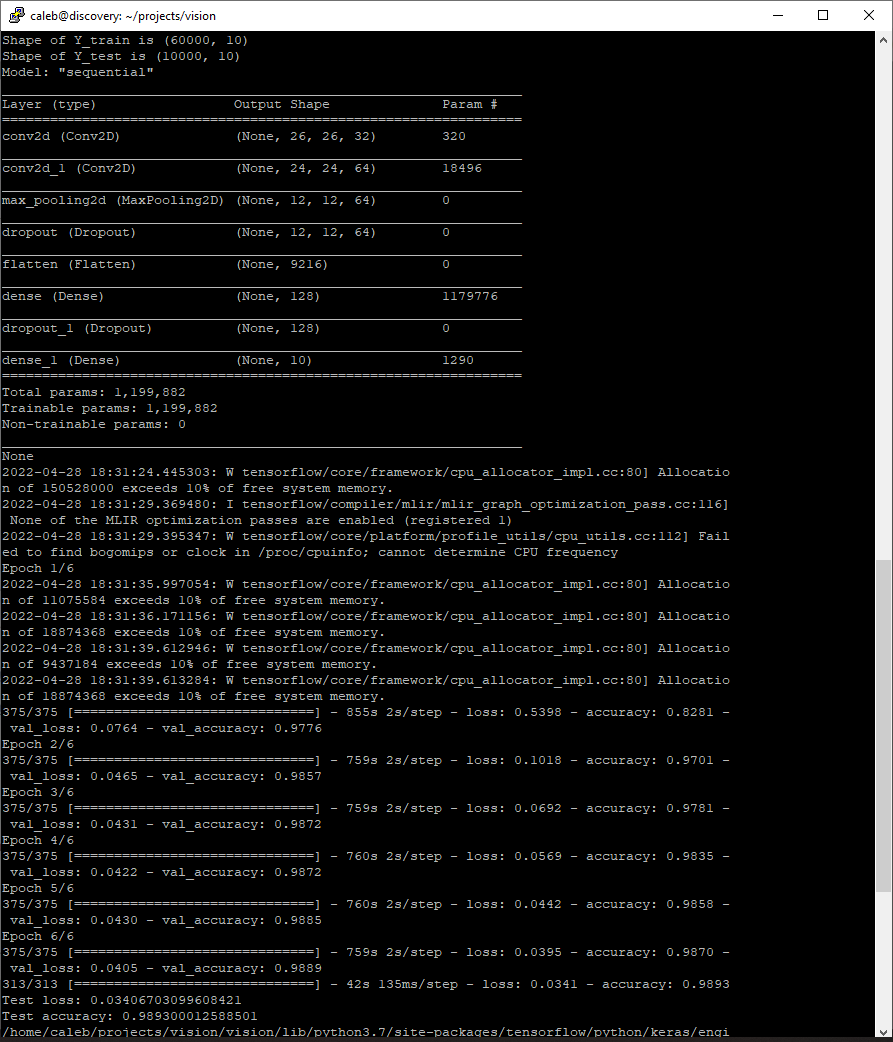
<center>Figure 5. Screenshot of Terminal showing successful network training on pi</center>

<center>Training Code:</center>

##### 3.3 IMPLEMENTATION OF THE HARDWARE

With training, the hardware like the camera was tested and image processing was tested as it would be used later for implementation of the trained model. Which was capturing, processing, and saving images to the directory and proved it could work for the model.

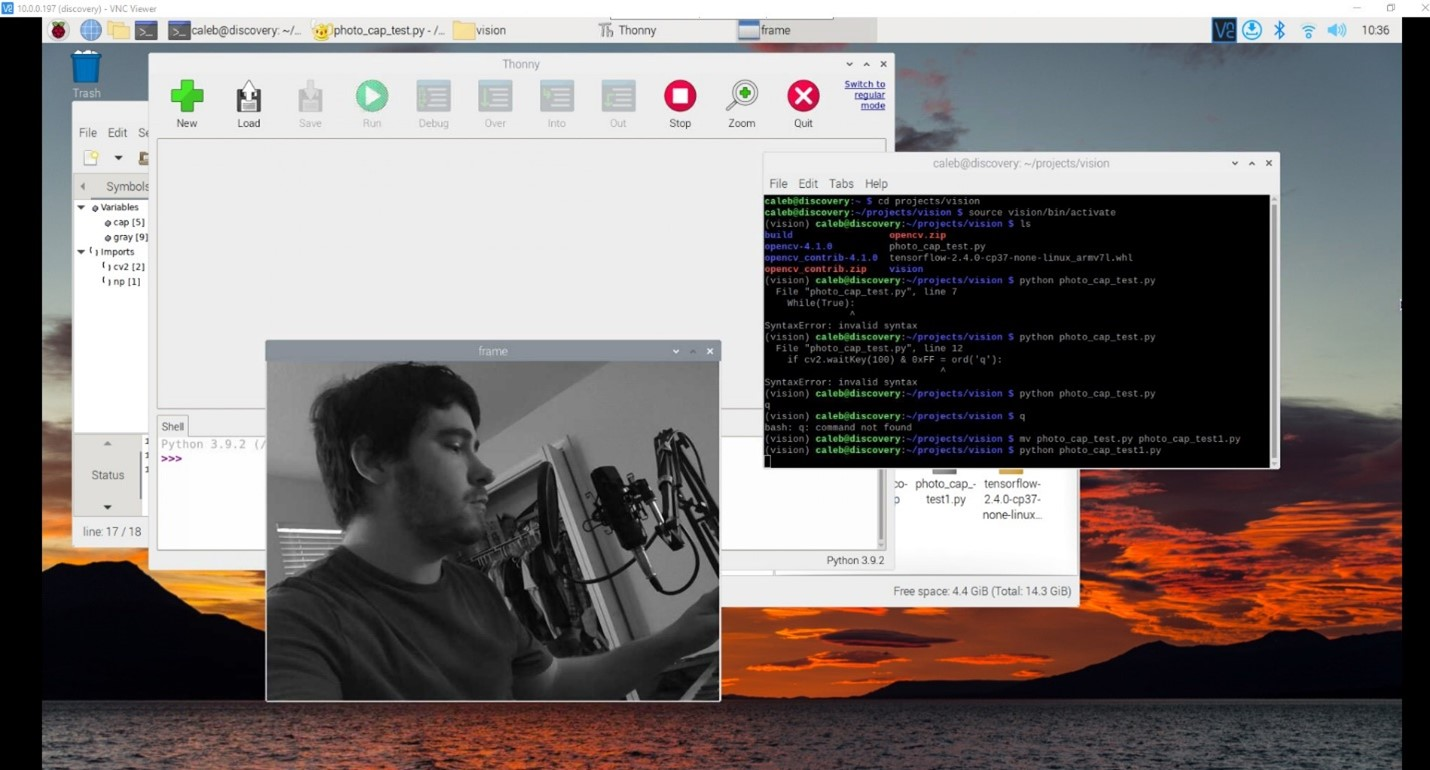
<center>Figure 6. Screenshot of Development enviroment first use of CV2</center>

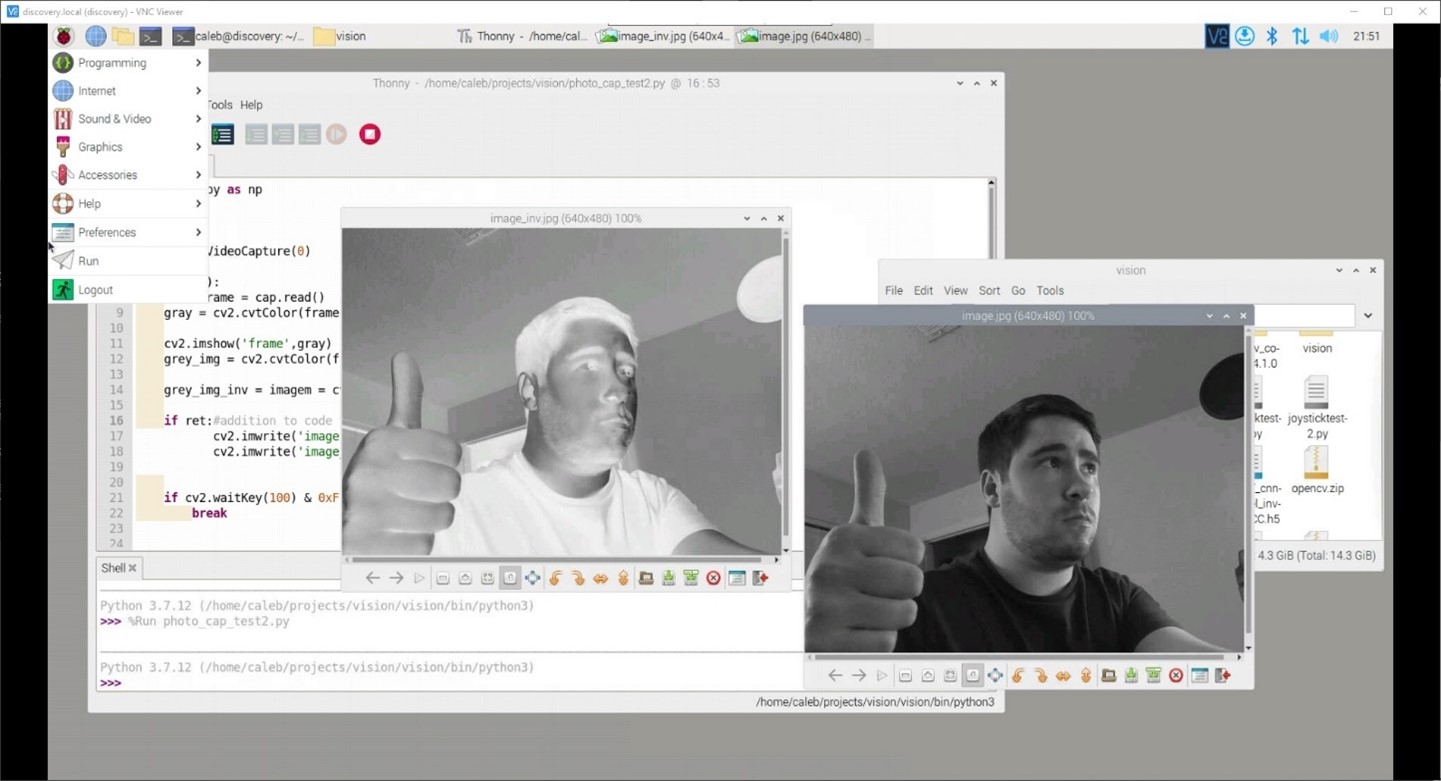
<center>Figure 7. Screenshot of development enviroment successful use of image processing for model</center>

<center>Image Processing Code:</center>

##### 3.2 INTEGRATING TOGETHER

The last large hurdle was integrating the model, the camera and the SenseHat, but eventually after about 5 iterations of code the final project code: visionmk5.py gave results below is some photos/screenshots of the process.

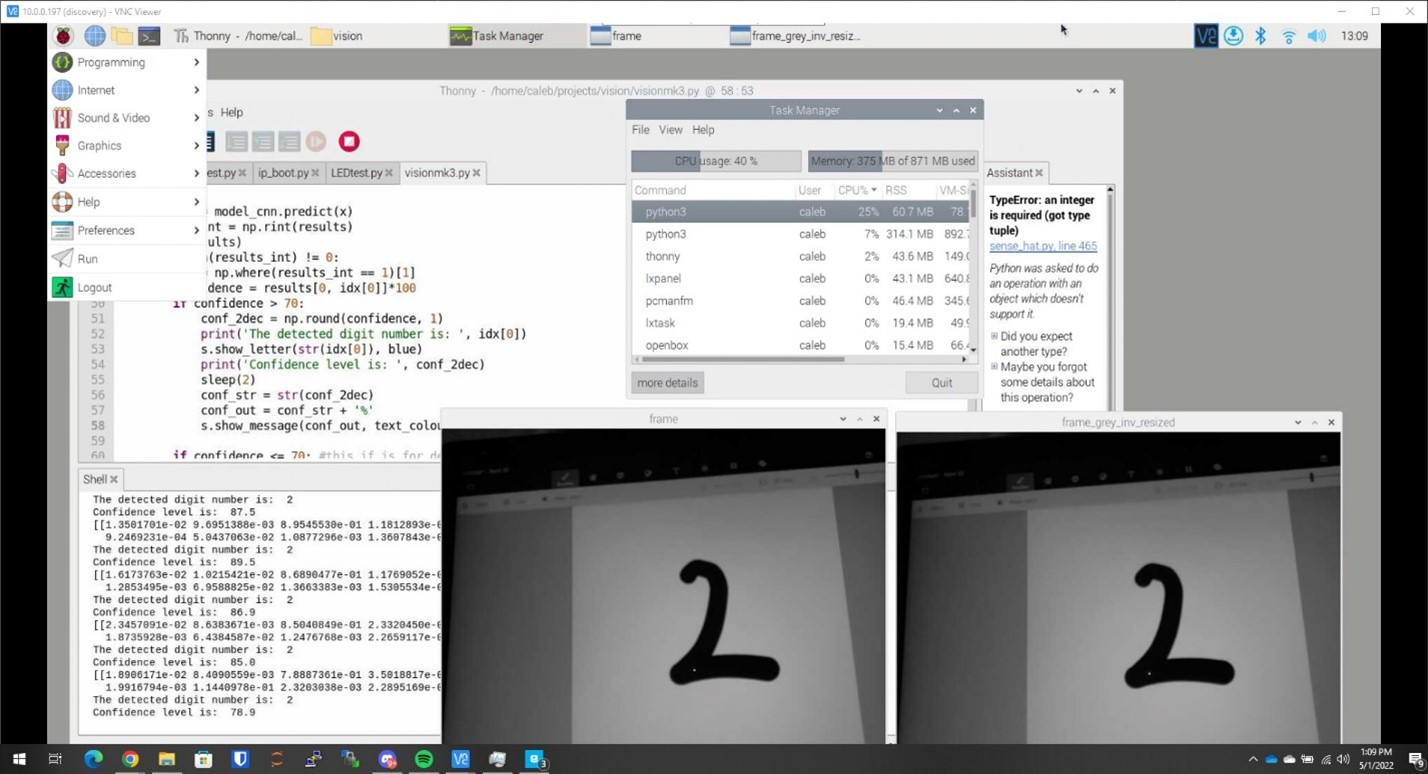
<center>Figure 8. Screenshot of development enviroment successful use of implemeting model</center>

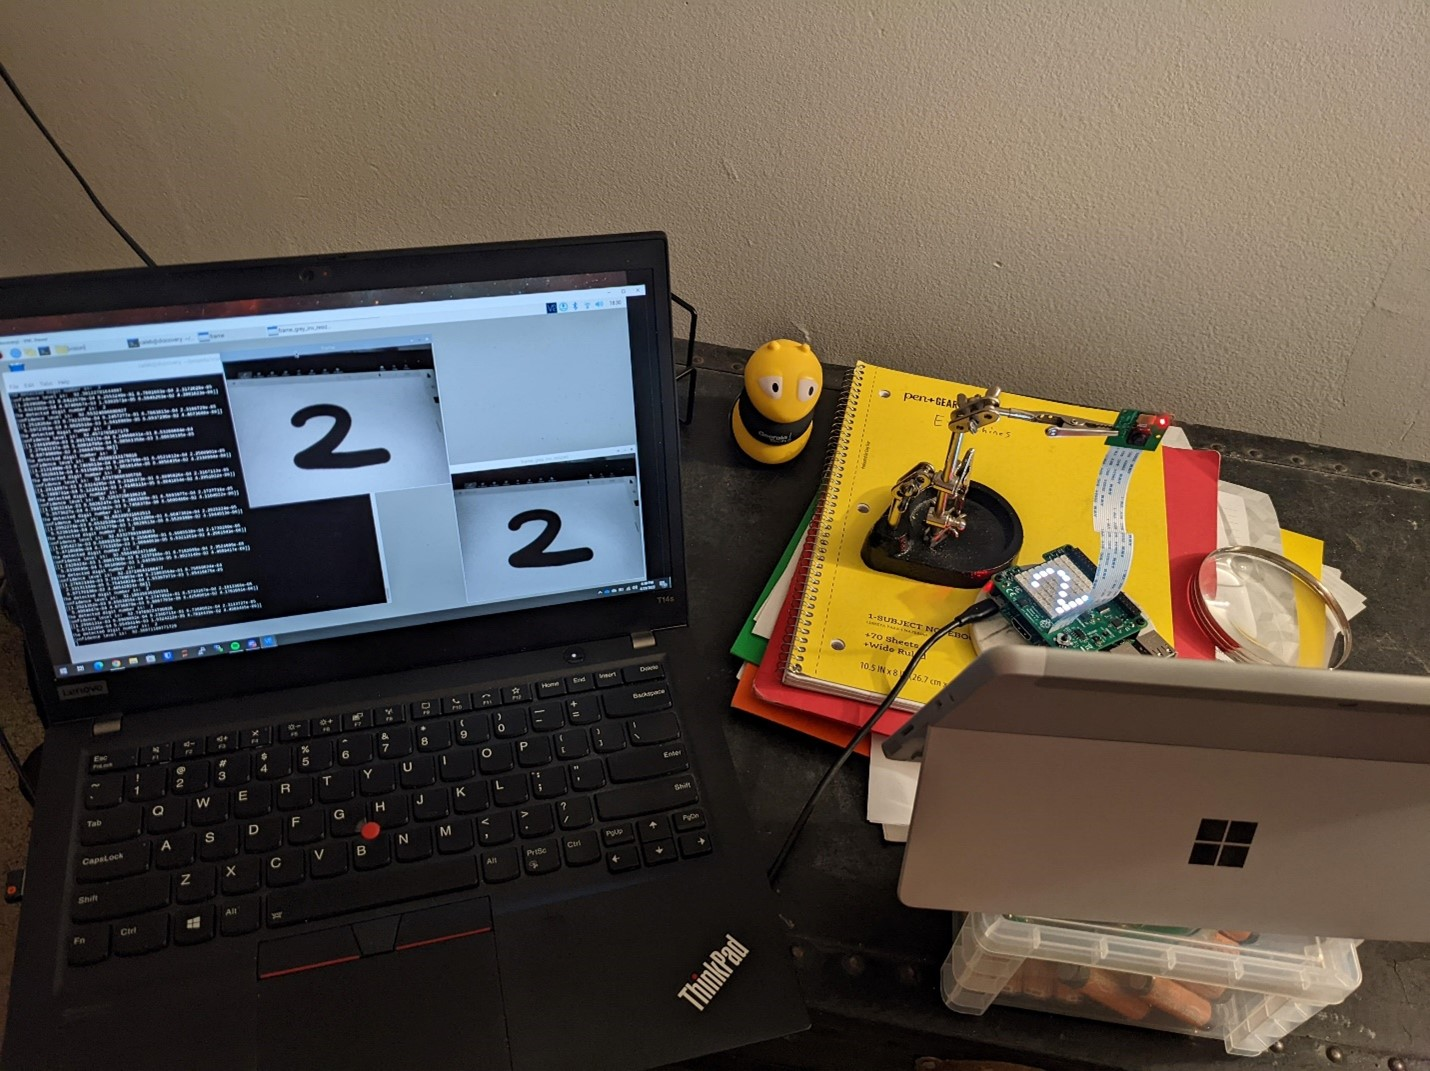
<center>Figure 9.Image of successful use of image of model and SenseHat output</center>

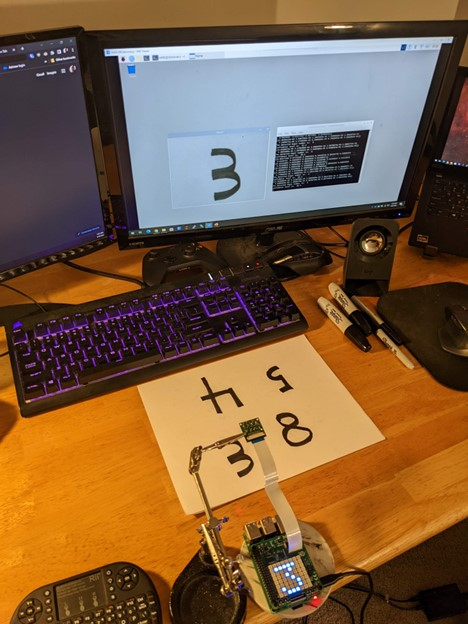
<center>Figure 10.Image of successful use of the entire device</center>

<center>visionmk5.py code:</center>

#### 4. DATA AND ANALYSIS

##### 4.1 DATA

The data shown is reflective of the train and test accuracy and the loss values while testing and training the neural network. Two hidden convolutional layers were used to train the network with their sizes being 32 and 64 respectively. A ReLU type activation function was utilized for both conv hidden layers afterward a dropout of 25% was implemented and a flattening layer was used. Then another dense hidden layer with activatation ReLU and a dropout of 50% was implemented to avoid overfitting the model. At the end a “softmax” activation was used to determine the output.

The Training of the neural network ran for 6 epochs with a batch size of 128, likely excessive for this use case as it did cause training to take approximately 3 hours to train on the pi 3b. Since the model’s goal is to classify numerical values into one of ten categories categorial_crossentropy was used for the model. The ‘Adam’ optimizer was used to find the best learning rate for the model without having to run it several times to get the best learning rate through trial and error. A validation spit of 20% was used to drive the validation statistics separate from the test sample batch. A full model summary can be found in the figure below.

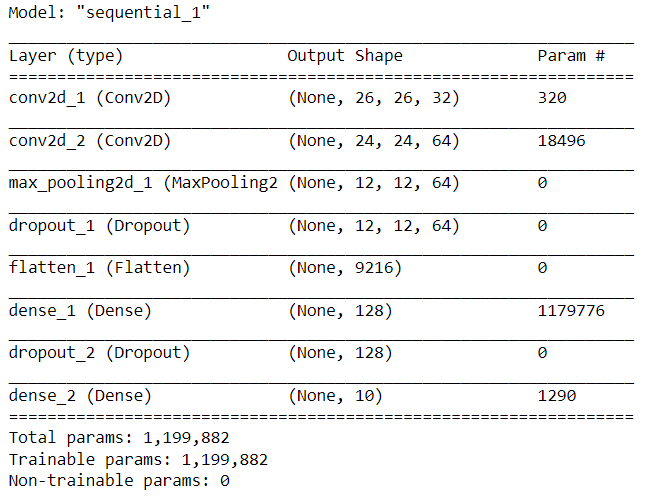
<center>Figure 11. Total Model Summary</center>

##### 4.2 Analysis

From the train/test data table and the plot of the loss and accuracy of the model the model was successfully trained and should work for interpreting handwriting.

 ||ACCURACY|LOSS VAL|
 |--------|--------|--------|
 |Test|0.9896000027|0.030275|
 |Train|0.995366692|0.015737|
 
 <center>Figure 12. Training and Testing Summary Table</center>

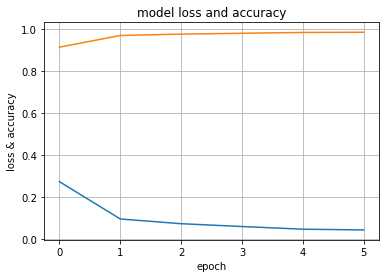
 <center>Figure 13. Accuracy and loss plot with respect to epoch</center>

#### 5. Conclusion 

This project was incredibly insightful from an engineering perspective, while on paper it might seem straightforward to implement machine learning there were quite a bit of challenges that needed to be addressed to get this project working. While there are some aspects of the project, I personally wished were more finished, given the hardware limitations and the bugs encountered the project seems to be largely a success demonstrated by the demo video linked at the end of this document. Overall, I personally learned a lot about machine learning from not just the software end but also the hardware end, knowing how ML abilities and limitations makes more informed on a visceral level because this project forced out of the box thinking.

[Link to Youtube Video Demonstrating the device function](https://youtu.be/ACOZQbrDuuk)